In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import warnings

warnings.filterwarnings('ignore')

## Import data

In [2]:
# data import function

def import_data(link, name):
    sheet_id = link
    sheet_name = name
    url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
    name = pd.read_csv(url)
    return name

# import dataframes

costs = import_data('1yvTfOtGWX7rHMrCWi8NSF4JTFbd7NvEv2SWCaiRpLIo', 'costs')
orders = import_data('1TVHwWxP8fkHJA1WzorQoetRDMi7vJwhQk8XNbak570I', 'orders_log')
visits = import_data('1Oqvg6GNwh8S8Y6IHx6X7HoPW8-5vBN9pNAU893SnrlU', 'visits_log')

Research of **general information** of each dataframe and **the data contained therein** :

- dataframe **'visits'**

In [3]:
display(visits.head())

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 1:54:00,5,2017-07-01 1:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  object
dtypes: int64(1), object(4)
memory usage: 13.7+ MB


- dataframe **'orders'**

In [5]:
display(orders.head())

,Buy Ts,Revenue,Uid
0,2017-06-01 0:10:00,17.00,10329302124590727494
1,2017-06-01 0:25:00,0.55,11627257723692907447
2,2017-06-01 0:27:00,0.37,17903680561304213844
3,2017-06-01 0:29:00,0.55,16109239769442553005
4,2017-06-01 7:58:00,0.37,14200605875248379450


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.2+ MB


In [7]:
orders['Buy Ts'].min()

'2017-06-01 0:10:00'

In [8]:
orders['Buy Ts'].max()

'2018-06-01 0:02:00'

The first purchase took place on June 1, 2017. The latest is June 1, 2018.

- dataframe **'costs'**

In [9]:
display(costs.head())

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [10]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


**Conclusions**:

The 'visits' dataframe contains information about visits to the Yandex.Afisha website. Includes 359400 rows and 5 columns:
- Uid — unique user ID,
- Device — user's device category,
- Start Ts — date and time of the session start,
- End Ts — date and time of the end of the session,
- Source Id — ID of the source of the transition to the site.

The 'orders' dataframe contains information about orders. Includes 50415 rows and 3 columns:
- Uid — unique user ID,
- Buy Ts — date and time of the order,
- Revenue — the amount of the order.

The 'costs' dataframe contains information about marketing expenses. Includes 2542 rows and 3 columns:
- source_id — the identifier of the advertising source,
- dt — date of the advertising campaign,
- costs — expenses for this campaign.

In the next section, data type conversion will be performed to continue the research.

## Data preprocessing

The date frames 'visits' and 'orders' in the column names contain uppercase letters. For further convenience, **column names are reduced to lowercase**

In [11]:
visits.columns = visits.columns.str.lower()

In [12]:
orders.columns = orders.columns.str.lower()

Also, some columns of the above dataframes contain names that are not very convenient in the name. Also performed **column renaming**

In [13]:
visits = visits.rename(columns={'end ts':'end_ts'})
visits = visits.rename(columns={'source id':'source_id'})
visits = visits.rename(columns={'start ts':'start_ts'})
orders = orders.rename(columns={'buy ts':'buy_ts'})

### Converting data to the right types

There are columns containing information about the date, have the type object.

This data type is not suitable for research, so they were **converted to the datetime type**

In [14]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

Added columns ** to 'visits' ** containing:
- full date, 
- number of the week, 
- month and year of the session start:

In [15]:
visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] =visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


### Search for duplicates

In [16]:
def duplicates(df, title_df):
    print(f'Duplicates found in the dataframe "{title_df}":', df.duplicated().sum())

duplicates(visits, 'visits')
duplicates(orders, 'orders')
duplicates(costs, 'costs')

Duplicates found in the dataframe "visits": 0
Duplicates found in the dataframe "orders": 0
Duplicates found in the dataframe "costs": 0


**Conclusion**:

The dataframes 'visits' and 'orders' in the column names contained uppercase letters. For convenience, they have been reduced to lowercase.

The columns have been renamed for further convenience.

Columns containing information about dates are given the datetime type.

To calculate weekly and monthly usage, the year, month and week, as well as the full date are allocated in separate columns in the 'visits' dataframe.

Duplicates are also not detected

## Research data analysis

### Product metrics

The research analysis started with an assessment of user activity. To do this, data on unique users are grouped and **DAU, WAU and MAU** are calculated - the number of unique users per day, per week and per month, respectively. It is also necessary to study how these indicators change over time

In [17]:
dau = visits.groupby('session_date').agg({'uid': 'nunique'})
wau = (visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}))
mau = (visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}))

In [18]:
print('Average number of unique users per day:', int(dau.mean()))
print('Average number of unique users per week:', int(wau.mean()))
print('Average number of unique users per month:', int(mau.mean()))

Average number of unique users per day: 907
Average number of unique users per week: 5716
Average number of unique users per month: 23228


Text(0.5, 0, 'Date')

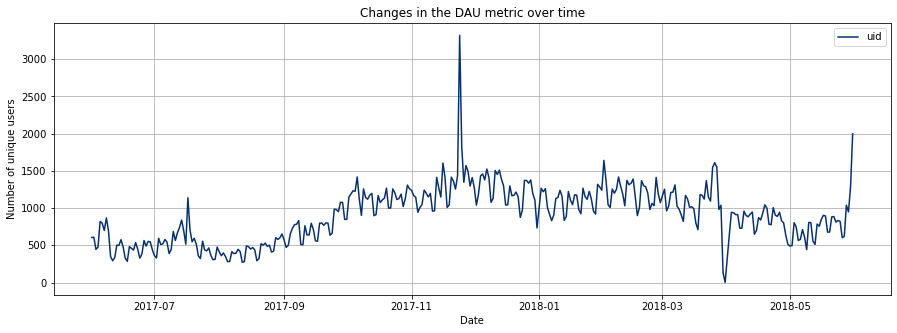

In [19]:
dau.plot(y = 'uid', 
         figsize = (15, 5),
         grid = True,
         cmap = 'Blues_r',
         title = 'Changes in the DAU metric over time')
plt.ylabel('Number of unique users')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

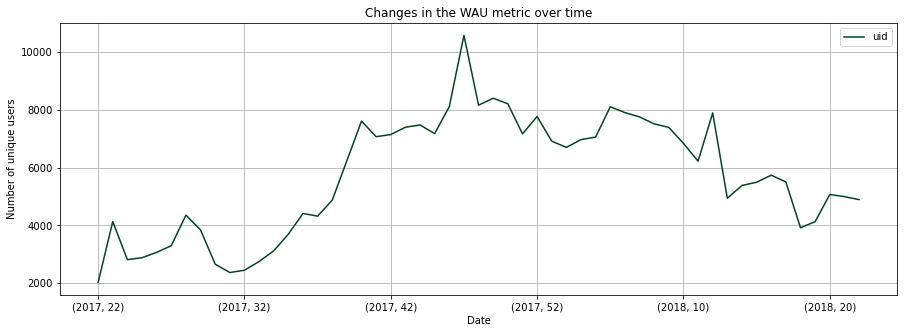

In [20]:
wau.plot(y = 'uid', 
         figsize = (15, 5),
         grid = True,
         cmap = 'Greens_r',
         title = 'Changes in the WAU metric over time')
plt.ylabel('Number of unique users')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

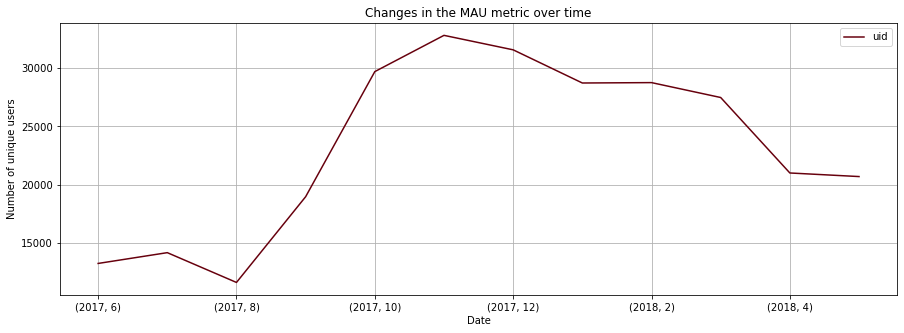

In [21]:
mau.plot(y = 'uid', 
         figsize = (15, 5),
         grid = True,
         cmap = 'Reds_r',
         title = 'Changes in the MAU metric over time')
plt.ylabel('Number of unique users')
plt.xlabel('Date')

An important indicator is ** the number of user sessions on the site per day **, because this is an indicator of the regularity of the use of the site.

The summary table 'sessions_per_user' shows the total number of users per day and the number of unique users per day. The columns with these indicators have been renamed to 'amount_sessions' and 'amount_users', respectively. 

To calculate the metric - the number of sessions per day, the total number of users is divided by the number of unique users. The column with the number of sessions per user will be called 'amount_sessions_per_user'

In [22]:
sessions_per_user = visits.groupby(['session_date']).agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['amount_sessions', 'amount_users']
sessions_per_user['amount_sessions_per_user'] = sessions_per_user['amount_sessions'] / sessions_per_user['amount_users']

In [23]:
sessions_per_user.head()

,amount_sessions,amount_users,amount_sessions_per_user
session_date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024


In [24]:
print('Minimum number of user sessions per day:', round(sessions_per_user['amount_sessions_per_user'].min(),2))
print('Average number of user sessions per day:', round(sessions_per_user['amount_sessions_per_user'].mean(),2))
print('Maximum number of user sessions per day:', round(sessions_per_user['amount_sessions_per_user'].max(),2))

Minimum number of user sessions per day: 1.0
Average number of user sessions per day: 1.08
Maximum number of user sessions per day: 1.22


Text(0.5, 0, 'Date')

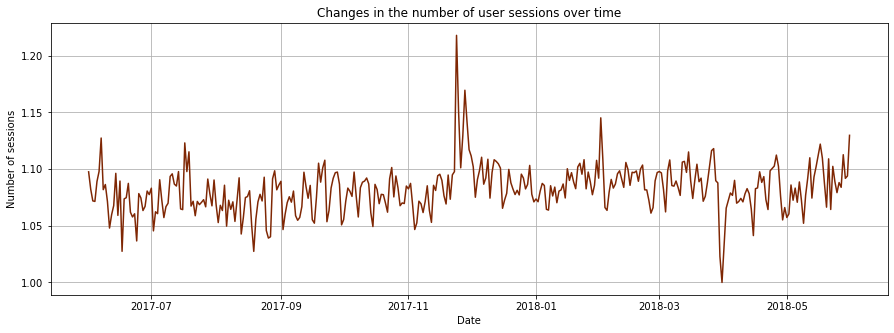

In [25]:
sessions_per_user['amount_sessions_per_user'].plot(y = 'uid', 
                                        figsize = (15, 5),
                                        grid = True,
                                        cmap = 'Oranges_r',
                                        title = 'Changes in the number of user sessions over time')
plt.ylabel('Number of sessions')
plt.xlabel('Date')

Next, the **duration of the user's session** on the site **is calculated in seconds** in the 'session_duration' column. To do this, the start date and time are subtracted from the end date and time of the session:

In [26]:
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

In [27]:
print('Average session duration:', round(visits['session_duration'].mean(),2))

Average session duration: 643.51


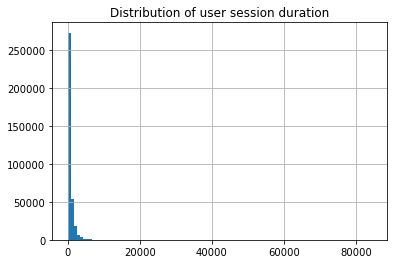

In [28]:
visits['session_duration'].hist(bins=100)
plt.title('Distribution of user session duration');

Based on the graph, we can conclude that **the distribution of the session duration does not look like a normal**. The next step is to calculate **mode** to find out the typical duration of a user session:

In [29]:
visits['session_duration'].mode()

0    60
dtype: int64

Thus, the mode of the user session duration is 60 seconds

An important part of this project is to research the change ** in the number of users who made a purchase for the first time **, by month. To do this, it is necessary to perform a **cohort analysis**. 

**Cohort** — a group of people united by the same event that occurred during a certain period of time

Conclusions from the cohort analysis can cause changes in the product and processes, it allows you to put forward new hypotheses. But this is a method of retrospective analysis — it answers the question of how users behaved in the past. Therefore, it is rarely used to predict user behavior that will be affected by external factors in the future.

One of the most important metrics of cohort analysis is the **Retention Rate**. It shows how many users from the cohort relative to their original number returned in subsequent periods.

In this case, the cohort will be users who visited the site for the first time in one month. 

In the new dataframe 'first_activity_date', the same user IDs are grouped and the earliest session start date is found for each. 

By the astype() method, the values are converted to the type 'datetime64[M]', where [M] means the dimension of the timestamp - month.

In [30]:
first_activity_date = visits.groupby(['uid'])['start_ts'].min()
first_activity_month = first_activity_date.astype('datetime64[M]')
first_activity_month.name = 'first_activity_month'
first_activity_month.head()

uid
1,03179E+19   2017-11-01
1,34335E+19   2017-10-01
1,53988E+16   2018-01-01
1,57554E+16   2018-03-01
1,90308E+15   2017-11-01
Name: first_activity_month, dtype: datetime64[ns]

The join() method combines the visits dataframe and the 'first_activity_month' series by the 'uid' column:

In [31]:
visits = visits.join(first_activity_month, on='uid')

visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration,first_activity_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0,2017-12-01


In the new 'activity_month' column of the 'visits' dataframe, the values of the 'start_ts' column are set to the 'datetime64[M]' type:

In [32]:
visits['activity_month'] = visits['start_ts'].astype('datetime64[M]')

To calculate **'lifetime' cohorts** from the month of the user's login to the site ('activity_date'), you need to subtract the month of the cohort's appearance ('first_activity_date').

The data in the new column is converted to the number of months that have passed between the dates. To do this, cohort_lifetime must be divided by the constant np.timedelta64(1, 'M') to find out how many quantities of 1 month length are contained in cohort_lifetime.

Due to the fact that the constant np.timedelta64(1, 'M') represents the average length of a month in a year, fractional numbers were obtained. Using the round() method, the column values are rounded and reduced to an integer type by the as type('int') method.

In [33]:
visits['cohort_lifetime'] = (visits['activity_month'] - visits['first_activity_month'])

visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1, 'M')

visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')

In [34]:
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration,first_activity_month,activity_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-01,2018-05-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0,2017-12-01,2017-12-01,0


The data is grouped by cohort and 'lifetime' in the 'cohorts' dataframe. For each cohort, the number of active users for a certain month of 'life' is calculated' cohorts.

In [35]:
cohorts = visits.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
cohorts.head()

,first_activity_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909


To find Retention Rate, need to get the number of users who were originally in the cohort, and divide the number of users by it in each following month. To do this, you need to find the initial number of users in the cohort. I'll take their number on the zero month.

Additionally, the column 'uid' was renamed to 'cohort_users'

In [36]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
initial_users_count.head()

,first_activity_month,cohort_users
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977


Cohort data is merged with the original number of users in the cohort:

In [37]:
cohorts = cohorts.merge(initial_users_count,on='first_activity_month')
cohorts.head()

,first_activity_month,cohort_lifetime,uid,cohort_users
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259


And finally, the Retention Rate is calculated by dividing the number of active users in each month by the initial number of users in the cohort:

In [38]:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

In [39]:
cohorts.head()

,first_activity_month,cohort_lifetime,uid,cohort_users,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557


The retention summary table will display the Retention Rate by month for each of the cohorts. The table is also the basis for building a **heat map**.

A heat map is a visualization of a table where cells with values change color depending on their proximity to the maximum or minimum value.

In [40]:
retention = cohorts.pivot_table(index='first_activity_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
retention

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


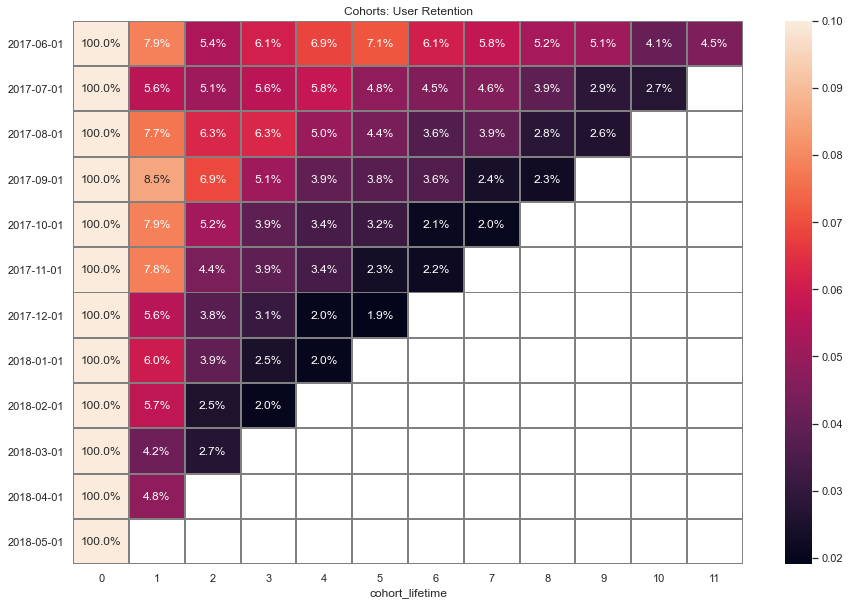

In [41]:
sns.set(style='whitegrid')
plt.figure(figsize=(15, 10))
plt.title('Cohorts: User Retention')
retention.index = [str(x)[0:10] for x in retention.index]
sns.heatmap(retention, annot=True, fmt='.1%', linewidths=1, linecolor='grey', vmax=0.1); 

Calculated **average Retention Rate for the second month of 'life' cohort**:

In [42]:
round((cohorts[cohorts['cohort_lifetime'] == 2][['retention']].mean()*100),2)

retention    4.63
dtype: float64

**Conclusion**:

The DAU metric shows the number of daily active users. It shows how many users logged into the app in a day. Accordingly, WAU is weekly active users. And MAU are unique users who visit the app at least once a month. The uniqueness of users is determined by ID or login.
In our case, the indicators have very good values:
- DAU - 907 users;
- WAU - 5716 users;
- MAU - 23228 users.

Since the analyzed period is a year, the visual display can analyze how the above indicators have changed.
The DAU was relatively low in the summer months of 2017. Perhaps this is due to the fact that traditionally this is the holiday season, respectively, fewer events are held for which tickets are sold on Yandex.Afisha. But with the onset of autumn, the number of unique daily users begins to rise. The peak falls on December 2017, which undoubtedly indicates an increase in visits for the New Year holidays: people buy tickets as a gift, as well as for themselves - usually very large-scale events are held for the holidays. After December, the metric is kept at about the same level. However, it is impossible not to notice a sharp decline in April 2018. There may have been a problem on the site or technical work was carried out.
WAU and MAU show about the same picture. However, due to the enlargement of time intervals, the decline in April 2018 is not so obvious.

Within the framework of product metrics, we should not forget about calculating the average number of user sessions per day, since it displays the regularity of site use. It is calculated as the remainder of dividing the number of sessions by the number of users for a certain period of time. On average, this indicator is 1.08, which means that a standard user visits the site more than 1 time. Also, the schedule of changes in the above metric over time has a peak in December 2017, which indicates that users returned to the Yandex.Afisha website more than once a month.

The duration of the user's session in seconds was also calculated. The graph based on the calculations showed that the distribution of the session duration does not look like normal, so the mod was calculated in order to find out the typical duration of the user session. According to fashion, it was 60 seconds, but the arithmetic mean was already 644 seconds, which is more like reality: the user chooses an event interesting to him within 10 minutes and purchases a ticket.

Cohort analysis was also carried out in this section. In particular, for calculating Retention Rate, which shows how many users from the cohort relative to their original number returned in subsequent periods. According to the heat map, built for a more convenient analysis, we can say that the Retention Rate in the first month decreases by cohorts over time: for the cohort of users who came in June 2017, the Retention Rate in the first month is 7.9%, then for users who came in July it is already 5.6%. It should be noted that in 6 months the retention rate fell by 2.3%. This suggests that about half of the users do not really want to return to the site. Perhaps you should pay attention to the design of the site or check the technical aspects.

### E-commerce metrics

In this project, an online trading enterprise is being researched, i.e. the process of buying and selling takes place using electronic means. To be effective, it is necessary to track key e-commerce metrics to track the state of the business.

This section will analyze such indicators as:
- the average amount of time from the first visit to the site to purchase;
- average number of purchases per customer;
- average check;
- LTV - the amount of money that the client brings in on average from all his purchases.

To study **the time between logging in to the site and buying**, the join() method combines data on orders ('orders') and data on the user's first session on the site Series 'first_activity_date'. 

To avoid confusion, the new column is renamed to 'first_ts'

In [43]:
orders = orders.join(first_activity_date, on='uid')
orders = orders.rename(columns={'start_ts':'first_ts'})
orders.head()

,buy_ts,revenue,uid,first_ts
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00


Added a new column 'time_before_purchase', which calculates **the difference in minutes between the first visit to the site and making a purchase**:

In [44]:
orders['time_before_purchase'] = orders['buy_ts']-orders['first_ts']
orders['time_before_purchase'] = orders['time_before_purchase']/ np.timedelta64(1, 'm')

<AxesSubplot:>

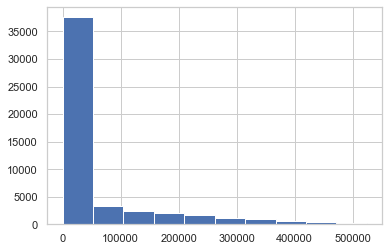

In [45]:
orders['time_before_purchase'].hist()

In [46]:
round(orders['time_before_purchase'].mode(),2)

0    1.0
dtype: float64

Next, the **number of purchases per customer is calculated, including the average value for six months** using cohort analysis.

For these purposes, the orders dataframe is used. 

To begin with, the data is grouped by a unique user ID and the earliest order date is found for each user:

In [47]:
first_order_month = orders.groupby(['uid'])['buy_ts'].min()
first_order_month = first_order_month.astype('datetime64[M]')
first_order_month.name = 'first_order_month'
first_order_month.head()

uid
10000837700716403746   2017-06-01
10000997030965831953   2018-01-01
10001199569370567060   2017-11-01
10002243978166172255   2017-10-01
10003351403065971701   2017-11-01
Name: first_order_month, dtype: datetime64[ns]

The resulting dataframe 'first_order_month' is merged with a date frame with 'orders' by column 'uid':

In [48]:
orders = orders.join(first_order_month, on='uid')
orders.head()

,buy_ts,revenue,uid,first_ts,time_before_purchase,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,1.0,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,11.0,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2.0,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,15.0,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,27.0,2017-06-01


The new column 'buy_month' contains the values of the column 'buy_ts', converted to the type 'datetime64[M]':

In [49]:
orders['buy_month'] = orders['buy_ts'].astype('datetime64[M]')

The 'cohort_lifetime' column will contain the difference between the month of the next order and the month of the first order. The values of this column will be the 'lifetime' of each cohort

In [50]:
orders['cohort_lifetime'] = (orders['buy_month'] - orders['first_order_month'])
orders['cohort_lifetime'] = orders['cohort_lifetime'] / np.timedelta64(1, 'M')
orders['cohort_lifetime'] = orders['cohort_lifetime'].round().astype('int')
orders.head()

,buy_ts,revenue,uid,first_ts,time_before_purchase,first_order_month,buy_month,cohort_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,1.0,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,11.0,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2.0,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,15.0,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,27.0,2017-06-01,2017-06-01,0


In the new dataframe 'orders_per_user' data is grouped by cohort and 'lifetime'each cohort. 

The number of user orders for each cohort in each of its 'lifetime' and the number of users who made an order are also calculated. The columns are named 'amount_orders' and 'amount_users', respectively.

The 'orders_per_user' column contains values about the number of orders per 1 user from each cohort.

In [51]:
orders_per_user = orders.groupby(['first_order_month','cohort_lifetime']).agg({'uid': ['count','nunique']})
orders_per_user.columns = ['amount_orders', 'amount_users']
orders_per_user['orders_per_user'] = orders_per_user['amount_orders'] / orders_per_user['amount_users']
orders_per_user = orders_per_user.reset_index()
orders_per_user.head()

,first_order_month,cohort_lifetime,amount_orders,amount_users,orders_per_user
0,2017-06-01,0,2354,2023,1.163618
1,2017-06-01,1,177,61,2.901639
2,2017-06-01,2,174,50,3.480000
3,2017-06-01,3,226,54,4.185185
4,2017-06-01,4,292,88,3.318182


Using the pivot_table method, a 'purchase_amount' dataframe was created, which displays all cohorts in the context of each month of their 'life' and the number of orders per 1 user:

In [52]:
purchases_amount = orders_per_user.pivot_table(index='first_order_month',
                                               values='orders_per_user',
                                               columns='cohort_lifetime',
                                               aggfunc='sum')
purchases_amount = round(purchases_amount,2)

In [53]:
purchases_amount

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.16,2.90,3.48,4.19,3.32,3.25,4.45,3.70,3.66,3.40,2.13,1.62
2017-07-01,1.14,1.92,2.11,1.62,1.47,2.16,1.69,1.28,1.38,1.09,2.04,NaN
2017-08-01,1.12,1.86,1.89,1.84,2.12,1.94,1.63,1.77,2.42,1.48,NaN,NaN
2017-09-01,1.14,1.68,1.61,2.22,1.29,1.70,1.64,1.51,1.42,NaN,NaN,NaN
2017-10-01,1.14,1.52,1.32,1.33,1.39,1.43,1.54,1.87,NaN,NaN,NaN,NaN
2017-11-01,1.18,1.79,1.52,1.99,1.68,1.23,1.65,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.15,1.85,1.96,1.85,1.72,1.67,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.12,1.96,1.92,1.49,1.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.12,1.88,1.43,1.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The average value of the number of orders for six months:

In [54]:
round((purchases_amount[5].mean()),2)

1.91

**Average check** is the turnover in monetary terms, reduced to the number of orders for a certain period,

The average check, despite the relative simplicity of calculation, is a comprehensive indicator that demonstrates how well thought out the range of goods and services, how competent the merchandising and marketing strategy is. It is calculated as the sum of all purchases made by customers for a certain period of time, divided by the number of orders for the same period.

In the new dataframe 'avg_oder', data is grouped by order time:

In [55]:
avg_oder = orders.groupby('buy_month').agg({'revenue': 'sum', 'uid': 'nunique'})

In [56]:
avg_oder.head()

,revenue,uid
buy_month,,
2017-06-01,9557.49,2023
2017-07-01,12539.47,1984
2017-08-01,8758.78,1472
2017-09-01,18345.51,2750
2017-10-01,27987.70,4675


In the 'revenue_per_user' column, the average buyer's check is calculated by dividing the order amount by the number of orders:

In [57]:
avg_oder['revenue_per_user'] = avg_oder['revenue']/avg_oder['uid']

The summary table shows **changes in the average check** by the month of purchase

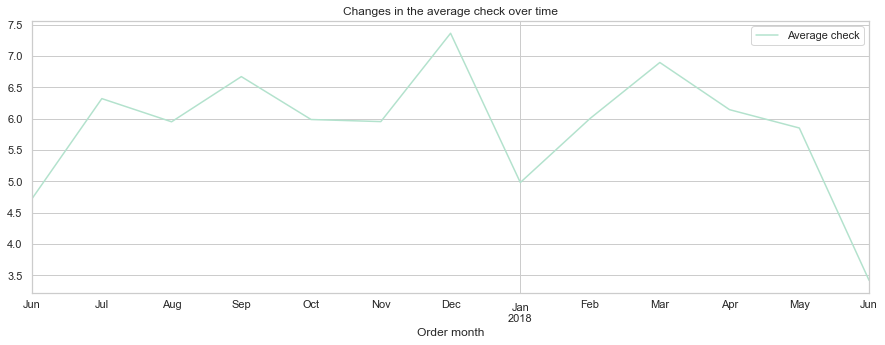

In [58]:
avg_oder.pivot_table(index='buy_month',
                     values='revenue_per_user',
                     aggfunc='mean').plot(figsize = (15, 5),
                                          grid = True,
                                          cmap = 'Pastel2')
plt.xlabel('Order month')
plt.title('Changes in the average check over time')
plt.legend(['Average check']);

Lifetime Value (**LTV**) is a metric that estimates the average revenue that a single app user or customer generates throughout their entire lifespan as either a free or paying user or customer.

The new dataframe 'new_buyers' calculates the number of new unique buyers in each month

In [59]:
new_buyers = (orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index())
new_buyers.columns = ['first_order_month', 'new_buyers']
new_buyers.head()

,first_order_month,new_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In the 'cohorts_rev' dataframe, order data is grouped by the month of the first purchase and the month of each order in the 'cohorts_rev' dataframe. Revenue is also summed up

In [60]:
cohorts_rev = orders.groupby(['first_order_month', 'buy_month']).agg({'revenue': 'sum'}).reset_index()
print(cohorts_rev.head())

  first_order_month  buy_month  revenue
0        2017-06-01 2017-06-01  9557.49
1        2017-06-01 2017-07-01   981.82
2        2017-06-01 2017-08-01   885.34
3        2017-06-01 2017-09-01  1931.30
4        2017-06-01 2017-10-01  2068.58


Since LTV is a cumulative metric from the point of view of cohort analysis, data on how many people made a purchase for the first time in each month has been added to the cohorts_rev table by creating a dataframe 'total_orders':

In [61]:
total_orders = pd.merge(new_buyers, cohorts_rev, on='first_order_month')
print(total_orders.head())

  first_order_month  new_buyers  buy_month  revenue
0        2017-06-01        2023 2017-06-01  9557.49
1        2017-06-01        2023 2017-07-01   981.82
2        2017-06-01        2023 2017-08-01   885.34
3        2017-06-01        2023 2017-09-01  1931.30
4        2017-06-01        2023 2017-10-01  2068.58


Since LTV is calculated from gross profit, it means that you need to find it by multiplying revenue by marginality. 

Because LTV is a relative indicator, it is more convenient to look at it by 'lifetime' cohorts.

The marginality of the service is 100%, so margin_rate = 1.

In [62]:
margin_rate = 1

total_orders['proceeds'] = total_orders['revenue'] * margin_rate
total_orders['cohort_lifetime'] = (total_orders['buy_month'] - total_orders['first_order_month'])/np.timedelta64(1, 'M')
total_orders['cohort_lifetime'] = total_orders['cohort_lifetime'].round().astype('int')
print(total_orders.head())

  first_order_month  new_buyers  buy_month  revenue  proceeds  cohort_lifetime
0        2017-06-01        2023 2017-06-01  9557.49   9557.49                0
1        2017-06-01        2023 2017-07-01   981.82    981.82                1
2        2017-06-01        2023 2017-08-01   885.34    885.34                2
3        2017-06-01        2023 2017-09-01  1931.30   1931.30                3
4        2017-06-01        2023 2017-10-01  2068.58   2068.58                4


It's time to find LTV directly. To do this, the gross profit of the cohorts for each month is divided by the total number of users in each cohort.

In [63]:
total_orders['ltv'] = total_orders['proceeds'] / total_orders['new_buyers']

ltv = total_orders.pivot_table(index='first_order_month', 
                               columns='cohort_lifetime', 
                               values='ltv', 
                               aggfunc='mean')
ltv = round(ltv.cumsum(axis=1),2)
ltv.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.5,7.66,7.78,7.92,8.08,8.23,8.39,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.38,7.59,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.4,,,,,
2017-12-01,4.74,5.0,5.92,6.99,7.3,7.64,,,,,,
2018-01-01,4.14,4.43,4.73,4.88,4.94,,,,,,,
2018-02-01,4.16,4.44,4.51,4.59,,,,,,,,


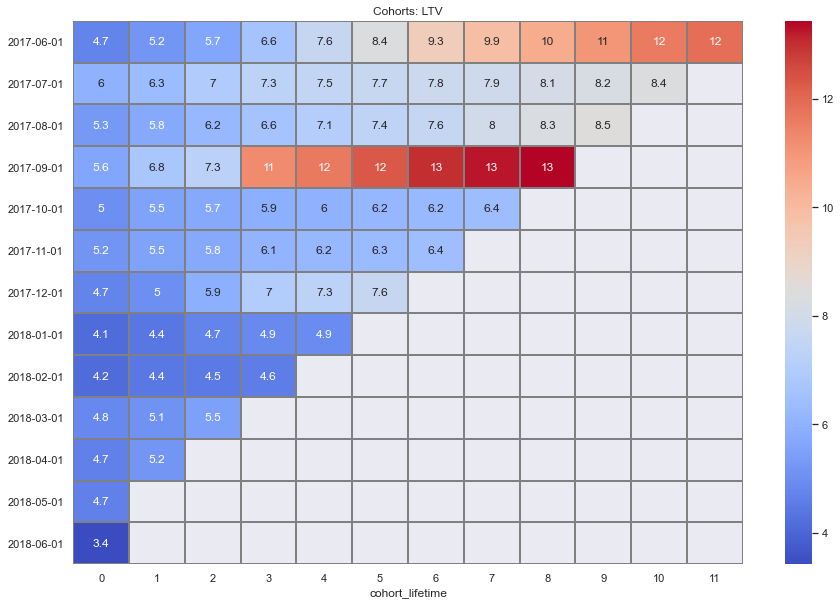

In [64]:
sns.set(style='darkgrid')
plt.figure(figsize=(15, 10))
plt.title('Cohorts: LTV')
ltv.index = [str(x)[0:10] for x in ltv.index]
sns.heatmap(ltv, annot=True, linewidths=1, linecolor='grey', cmap= 'coolwarm'); 

In [65]:
# average ltv for the fifth month of 'life' cohort

round(ltv[5].mean(),2)

7.97

**Conclusion:**

Within the framework of e-commerce metrics, such an indicator as the time between logging on to the site and buying was researched. The distribution of this metric on the graph is also far from normal. According to fashion, the standard time from entering the site and ordering is 1 minute.

To identify the number of purchases per customer, a cohort analysis was performed, as a result of which it was found that a cohort of users makes about 1 order per person in the first month, but with an increase in the 'age' of a particular cohort, the number of orders increases dramatically.
When analyzing 6 months' life Among the cohorts, it was revealed that there are on average about 2 orders per 1 user. This means that users are satisfied with the first order and return to make subsequent ones.

It may not be enough to monitor only the number of transactions to assess success. It is very useful to track the change of another e-commerce metric - the average receipt.
The average check is a metric that needs to be monitored from time to time. In general, on the graph of changes in this metric over time, you can observe jumps in July, September and, of course, in December 2017. These changes may be the result of large events for which the ticket price is high or an increase in their number. To increase the average receipt, you can add categories of recommended products to the page. This will force buyers to add more items to the shopping cart. In e-commerce, the growth of the indicator can be influenced by:

- improvement of the structure, convenience of using the online store;
- using the techniques of cross-sell (offers of additional products) and up-sell (offers of more expensive products)
- discounts and promotions.

Some customers may not initially make a profit. And their involvement can be expensive. Over time, customers become more profitable. Others may become profitable after a certain period of time. It will always be useful to make sure that the vital value of customers is high, as long as it is possible. The LTV metric is used for this. Research shows that existing customers bring in 67% more money than new ones. This will also increase the average cost of the order mentioned above. It is worth thinking ahead and considering how much the client will spend over time. Therefore, the metric is important for tracking.

On the heat map, you can see that the LTV metric increases as the 'life' increases' cohorts. So, users who made a purchase for the first time in June 2017 began to earn twice as much money after six months: the LTV indicator increased from 4.7 to 9.3. It is especially worth noting the cohort of users who made a purchase in September 2017: already for the 3rd month of the 'life' of this cohort, LTV doubled from 5.6 to 11 units., which is a third more than the average value for all cohorts for six months

### Marketing metrics

In this subsection, the research began with calculating ** the distribution of costs by sources, as well as calculating the total amount of marketing expenses **.

To do this, a column 'costs_month' has been created in the 'costs' dataframe, which will contain the month and year of the advertising campaign:

In [66]:
costs['costs_month'] = costs['dt'].astype('datetime64[M]')

Further, in the 'costs_sources' dataframe, the data is grouped so that the costs are distributed by sources and by dates of advertising campaigns:

In [67]:
costs_sourses = costs.pivot_table(index='costs_month', columns='source_id', values = 'costs', aggfunc = 'sum')

In [68]:
costs_sourses.head()

source_id,1,2,3,4,5,9,10
costs_month,,,,,,,
2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24


The graph shows a visualization of the changes in the above metrics over time:

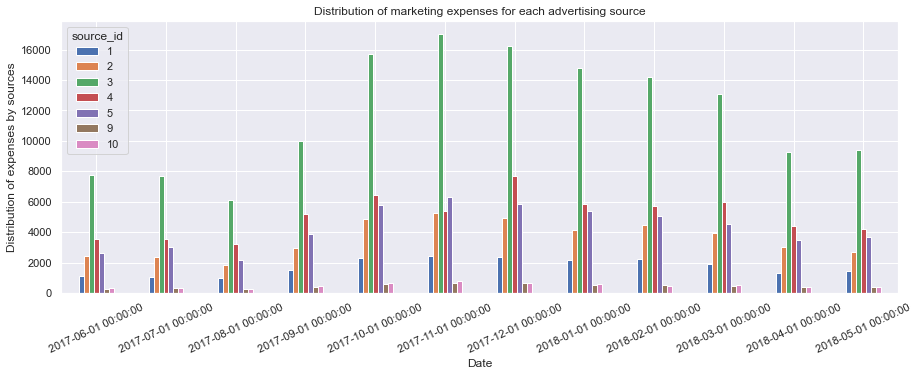

In [69]:
costs_sourses.plot(figsize = (15, 5), kind = 'bar', grid = True)
costs_sourses.index = [str(x)[0:10] for x in costs_sourses.index]
plt.title('Distribution of marketing expenses for each advertising source')
plt.ylabel('Distribution of expenses by sources')
plt.xlabel('Date')
plt.xticks(rotation=25);

In [70]:
print('Total expenses for advertising campaigns:', costs['costs'].sum())

Total expenses for advertising campaigns: 329131.62


One of the most important marketing metrics is **CAC** — the cost of attracting a client. This is the amount of money that a new client of the company costs.

Before the direct calculation of the CAC, preparatory calculations were performed: a dataframe 'monthly_cost' was created, in which data on the month of advertising campaigns were grouped and the costs for each of them were summed up

In [71]:
monthly_costs = costs.groupby('costs_month').sum()
monthly_costs.head()

,source_id,costs
costs_month,,
2017-06-01,1020,18015.00
2017-07-01,1054,18240.59
2017-08-01,1054,14790.54
2017-09-01,1020,24368.91
2017-10-01,1054,36322.88


The 'cac' dataframe combines 'total_orders' and the previously created 'monthly_cost'.

CAC is the quotient of dividing costs by the number of buyers. A new column 'cac' has been added and the indicator itself has been calculated

In [72]:
cac = pd.merge(total_orders, monthly_costs, left_on='first_order_month', right_on='costs_month')
cac['cac'] = cac['costs'] / cac['new_buyers']

In [73]:
cac.head()

,first_order_month,new_buyers,buy_month,revenue,proceeds,cohort_lifetime,ltv,source_id,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,1020,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329,1020,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.437637,1020,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.954671,1020,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.022531,1020,18015.0,8.905091


Next, in the dataframe 'cac_pivot_table', the average CAC per buyer for the entire project is calculated and the graph shows the change in the metric over time:

In [74]:
cac_pivot_table = cac.pivot_table(index='first_order_month', values = 'cac', aggfunc = 'mean')

In [75]:
cac_pivot_table.head()

,cac
first_order_month,
2017-06-01,8.905091
2017-07-01,9.485486
2017-08-01,10.796015
2017-09-01,9.441654
2017-10-01,8.369327


In the 'wer' dataframe, the data of the 'visits' dataframe is grouped by a unique user number. Also, using the first() method, the first advertising source was found for each user. Additionally, the columns were renamed to 'uid' and 'first_id_source', respectively

In [76]:
wer = visits.sort_values('start_ts').groupby(['uid'])['source_id'].first().reset_index()
wer.columns = 'uid', 'first_id_source'
wer.head()

,uid,first_id_source
0,"1,03179E+19",3
1,"1,34335E+19",5
2,"1,53988E+16",3
3,"1,57554E+16",4
4,"1,90308E+15",3


The 'war' dataframe is attached to the 'orders' dataframe so that in the new 'order_source' dataframe, each unique user number corresponds to the number of the advertising source from which it originally came

In [77]:
orders_source = pd.merge(orders, wer, on='uid')
orders_source.head()

,buy_ts,revenue,uid,first_ts,time_before_purchase,first_order_month,buy_month,cohort_lifetime,first_id_source
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,1.0,2017-06-01,2017-06-01,0,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,11.0,2017-06-01,2017-06-01,0,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2.0,2017-06-01,2017-06-01,0,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,15.0,2017-06-01,2017-06-01,0,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,27.0,2017-06-01,2017-06-01,0,3


The data of the 'order_source' dataframe is grouped by month and by advertising source to get the number of new buyers.
Additionally renamed columns

In [78]:
new_new_buyers = (orders_source.groupby(['first_order_month', 'first_id_source']).agg({'uid': 'nunique'}).reset_index())
new_new_buyers.columns = ['first_order_month', 'source_id','new_buyers']
new_new_buyers.head()

,first_order_month,source_id,new_buyers
0,2017-06-01,1,190
1,2017-06-01,2,235
2,2017-06-01,3,638
3,2017-06-01,4,413
4,2017-06-01,5,384


Additionally, data is grouped by the month of the first order, the month of the order and the advertising source to find the total amount of profit for each cohort:

In [79]:
new_cohorts_rev = orders_source.groupby(['first_order_month', 'buy_month', 'first_id_source']).agg({'revenue': 'sum'}).reset_index()
new_cohorts_rev = new_cohorts_rev.rename(columns={'first_id_source':'source_id'})
new_cohorts_rev.head()

,first_order_month,buy_month,source_id,revenue
0,2017-06-01,2017-06-01,1,1378.70
1,2017-06-01,2017-06-01,2,1043.68
2,2017-06-01,2017-06-01,3,2804.34
3,2017-06-01,2017-06-01,4,1959.84
4,2017-06-01,2017-06-01,5,1898.89


Merged 2 dataframes 'new_new_buyers' and 'new_cohorts_rev'. The LTV metric is calculated in the 'ltv' column

In [80]:
new_total_orders = pd.merge(new_new_buyers, new_cohorts_rev, on=['first_order_month', 'source_id'])
new_total_orders['ltv'] = new_total_orders['revenue'] / new_total_orders['new_buyers']
new_total_orders.head()

,first_order_month,source_id,new_buyers,buy_month,revenue,ltv
0,2017-06-01,1,190,2017-06-01,1378.70,7.256316
1,2017-06-01,1,190,2017-07-01,414.98,2.184105
2,2017-06-01,1,190,2017-08-01,419.43,2.207526
3,2017-06-01,1,190,2017-09-01,714.24,3.759158
4,2017-06-01,1,190,2017-10-01,811.20,4.269474


Marginality is taken as 100%, so margin_rate = 1. The 'processes' column calculates the profit and the 'lifetime' for each cohort

In [81]:
margin_rate = 1

new_total_orders['proceeds'] = new_total_orders['revenue'] * margin_rate
new_total_orders['cohort_lifetime'] = (new_total_orders['buy_month'] - new_total_orders['first_order_month'])/np.timedelta64(1, 'M')
new_total_orders['cohort_lifetime'] = new_total_orders['cohort_lifetime'].round().astype('int')

The data of the 'costs' dataframe is grouped by the month of the advertising campaign and the advertising source, respectively

In [82]:
monthly_costs_source = costs.groupby(['costs_month','source_id']).sum().reset_index()
monthly_costs_source.head()

,costs_month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12


Merged dataframes 'new_total_orders' and 'monthly_costs_source'. Now we have all the data for calculating the CAC for each source

In [83]:
new_total_orders = new_total_orders.merge(monthly_costs_source, 
                                          left_on = ['first_order_month', 'source_id'], 
                                          right_on = ['costs_month', 'source_id'])
new_total_orders.head()

,first_order_month,source_id,new_buyers,buy_month,revenue,ltv,proceeds,cohort_lifetime,costs_month,costs
0,2017-06-01,1,190,2017-06-01,1378.70,7.256316,1378.70,0,2017-06-01,1125.61
1,2017-06-01,1,190,2017-07-01,414.98,2.184105,414.98,1,2017-06-01,1125.61
2,2017-06-01,1,190,2017-08-01,419.43,2.207526,419.43,2,2017-06-01,1125.61
3,2017-06-01,1,190,2017-09-01,714.24,3.759158,714.24,3,2017-06-01,1125.61
4,2017-06-01,1,190,2017-10-01,811.20,4.269474,811.20,4,2017-06-01,1125.61


Calculation of the SAS:

In [84]:
new_total_orders['cac'] = new_total_orders['costs'] / new_total_orders['new_buyers']
new_total_orders.head()

,first_order_month,source_id,new_buyers,buy_month,revenue,ltv,proceeds,cohort_lifetime,costs_month,costs,cac
0,2017-06-01,1,190,2017-06-01,1378.70,7.256316,1378.70,0,2017-06-01,1125.61,5.924263
1,2017-06-01,1,190,2017-07-01,414.98,2.184105,414.98,1,2017-06-01,1125.61,5.924263
2,2017-06-01,1,190,2017-08-01,419.43,2.207526,419.43,2,2017-06-01,1125.61,5.924263
3,2017-06-01,1,190,2017-09-01,714.24,3.759158,714.24,3,2017-06-01,1125.61,5.924263
4,2017-06-01,1,190,2017-10-01,811.20,4.269474,811.20,4,2017-06-01,1125.61,5.924263


Heat maps for each source:

In [85]:
# the function of building a heat map for CSS

def CAC(month_number):
    cac = new_total_orders.query(f'source_id == {month_number}').pivot_table(index='first_order_month', 
                                                                             columns='cohort_lifetime',
                                                                             values='cac', 
                                                                             aggfunc='mean')
    cac = round(cac.cumsum(axis=1),2)
    cac.fillna('')
    sns.set(style='darkgrid')
    plt.figure(figsize=(15, 7))
    plt.title(f'САС, Источник № {month_number}', fontdict={'size':20})
    cac.index = [str(x)[0:10] for x in cac.index]
    sns.heatmap(cac, annot=True, linewidths=1, linecolor='grey', cmap= 'winter'); 

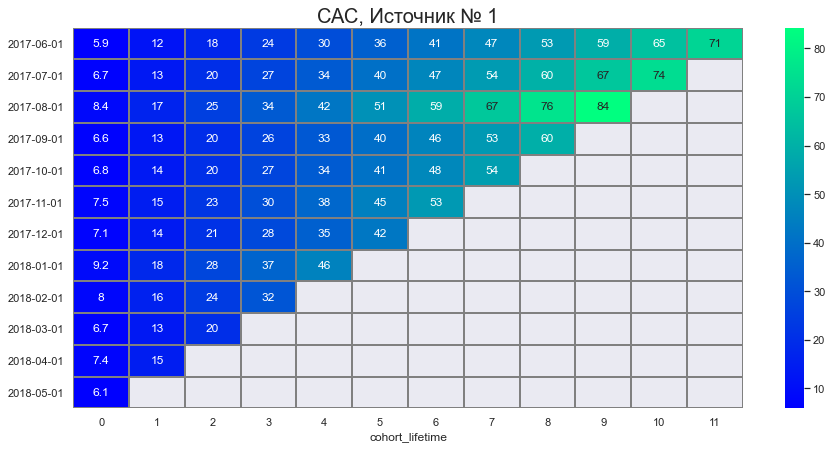

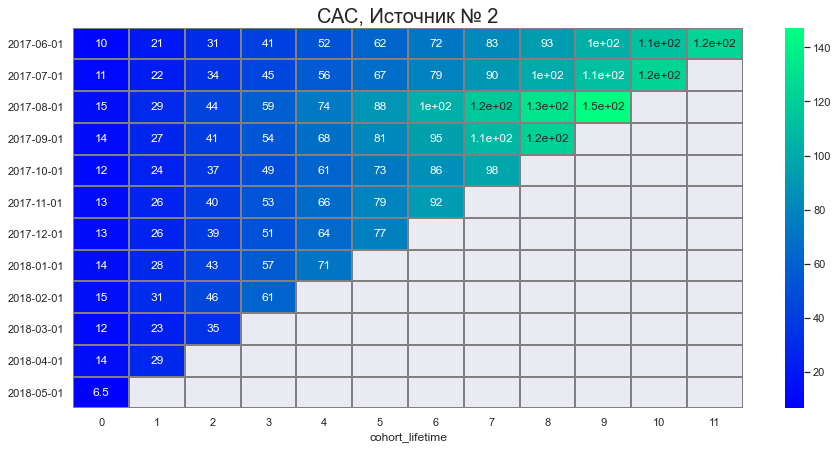

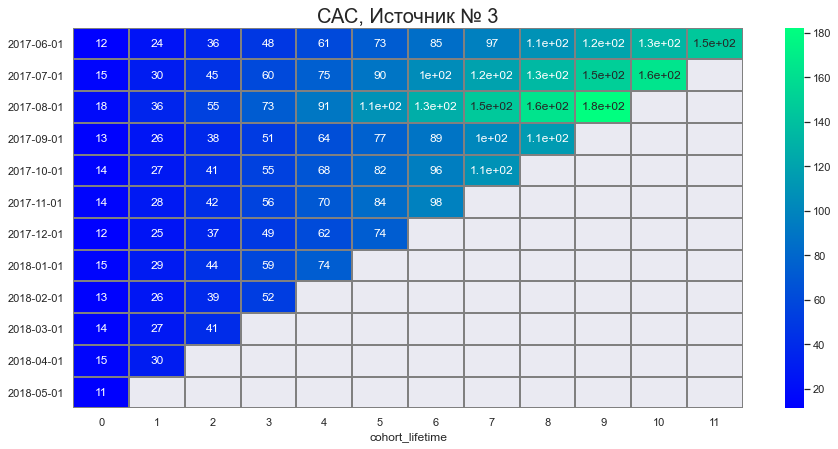

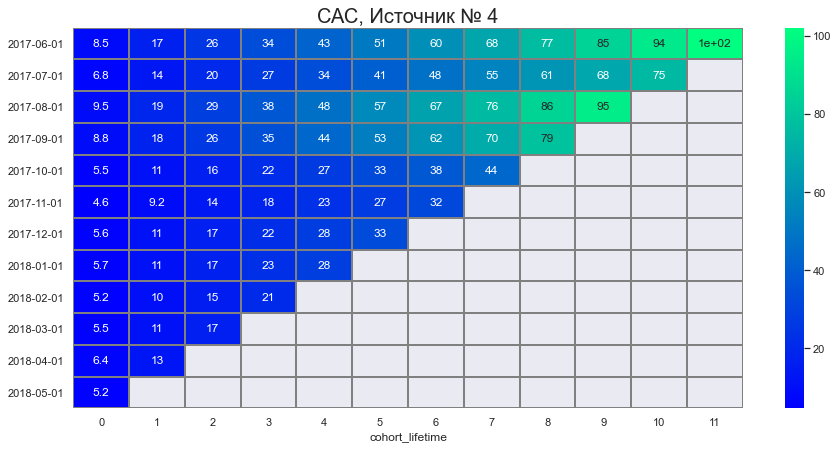

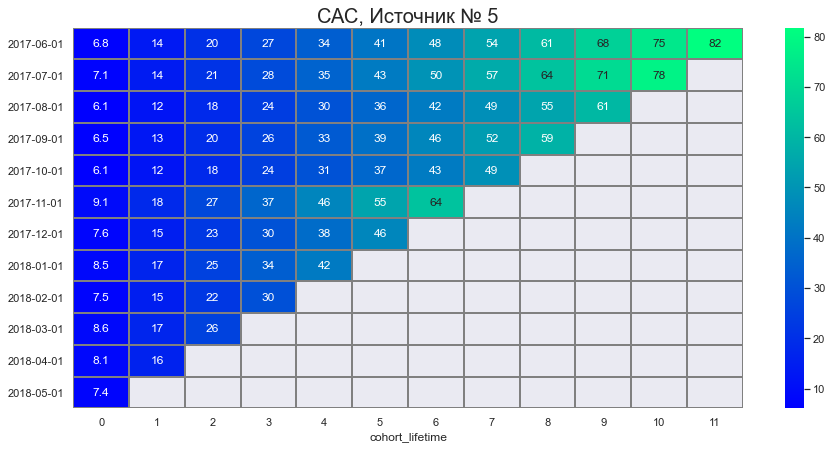

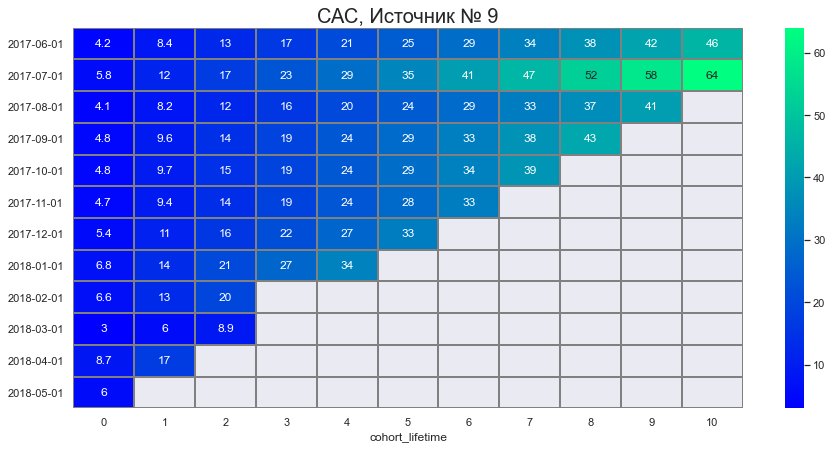

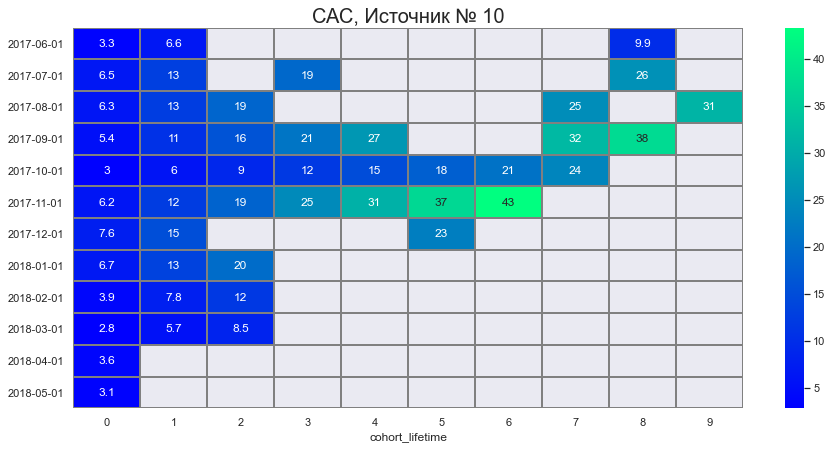

In [86]:
# a list of source numbers is stored in variable 'cac_num', with a CAC value not equal to zero

cac_num = new_total_orders.groupby('source_id')['cac'].mean().index

# the function is called for sources from the above list

for month in cac_num:
    CAC(month)

Another important metric of marketing analysis is **ROMI**. This indicator is used to find out when investors' investments will pay off.

The metric is analyzed by cohorts in the context of sources.

Romi is calculated by dividing ltv by cac. Also, a heat map is built for each source

In [87]:
new_total_orders['romi'] = new_total_orders['ltv']/new_total_orders['cac']

In [88]:
def ROMI(month_number):
    romi = new_total_orders.query(f'source_id == {month_number}').pivot_table(index='first_order_month',
                                                                              columns='cohort_lifetime',
                                                                              values='romi', 
                                                                              aggfunc='mean')
    
    romi = round(romi.cumsum(axis=1),2)
    sns.set(style='whitegrid')
    plt.figure(figsize=(15, 7))
    plt.title(f'ROMI, Источник № {month_number}', fontdict={'size':20})
    romi.index = [str(x)[0:10] for x in romi.index]
    sns.heatmap(romi, annot=True, linewidths=1, linecolor='grey', cmap= 'Blues');

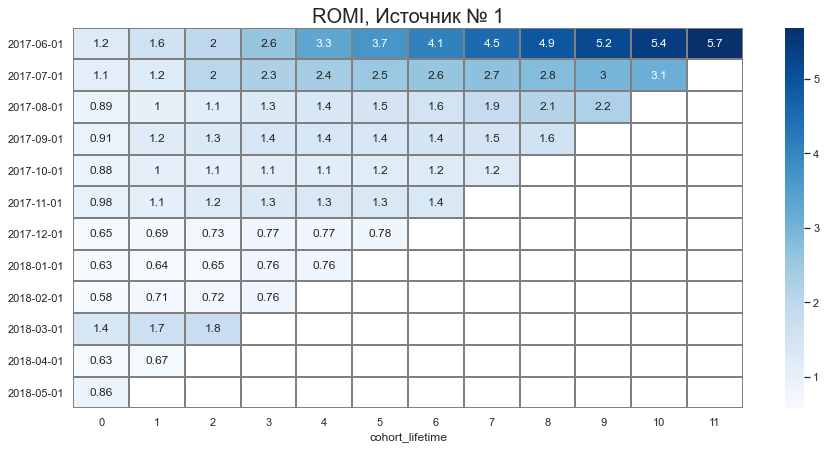

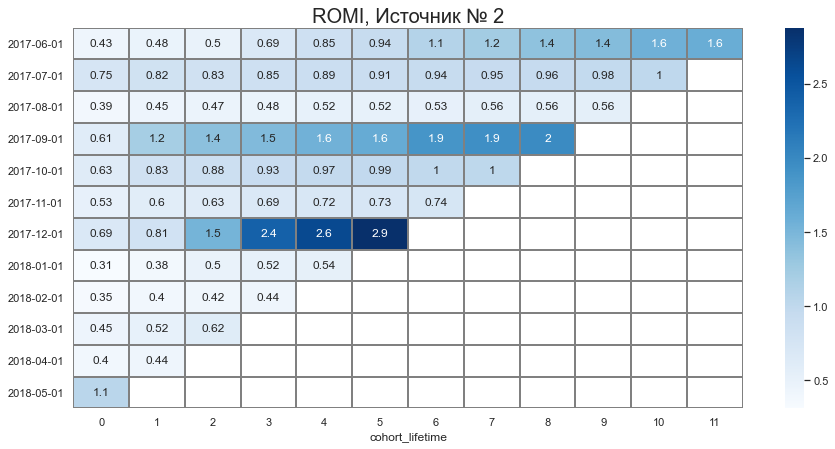

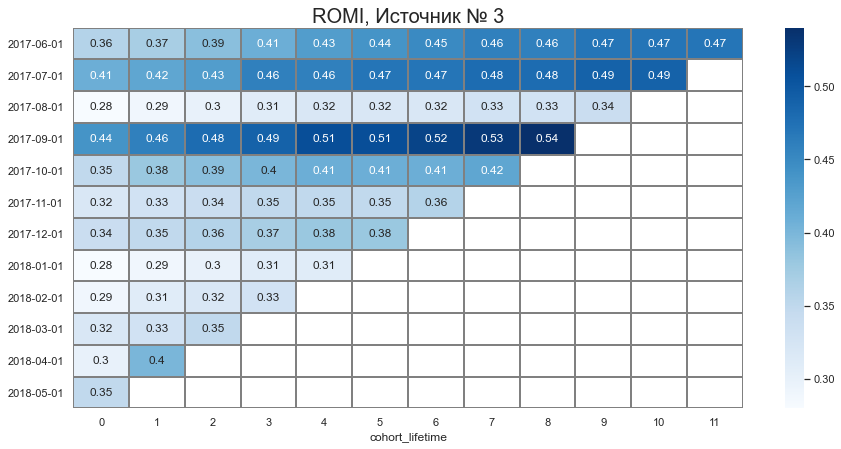

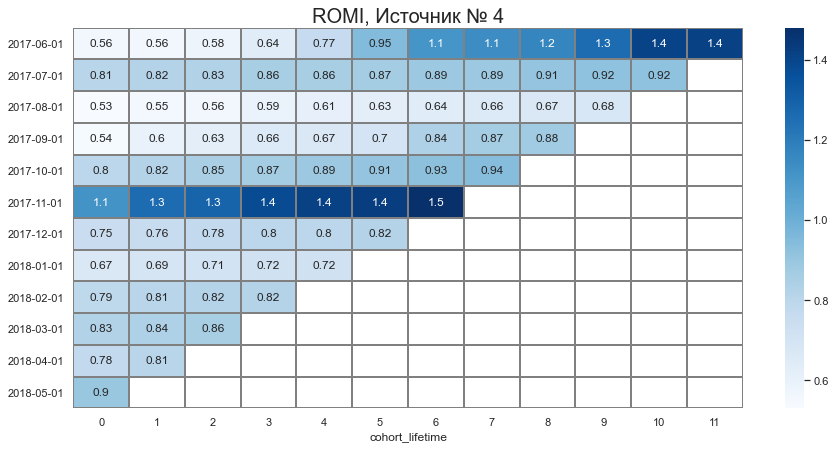

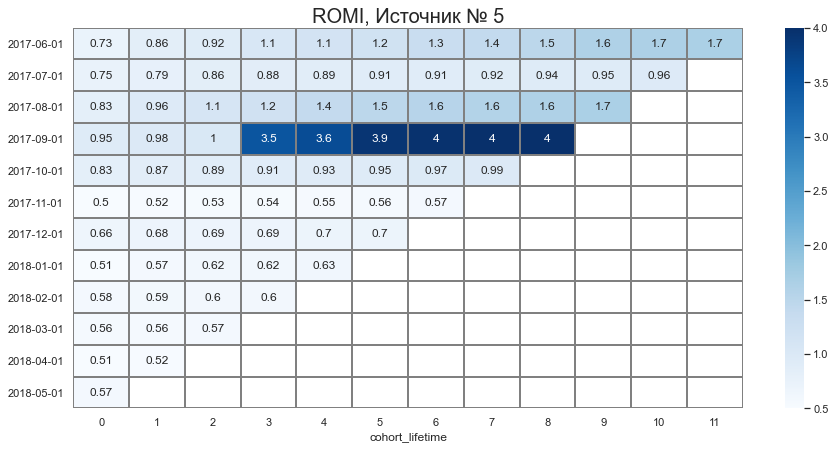

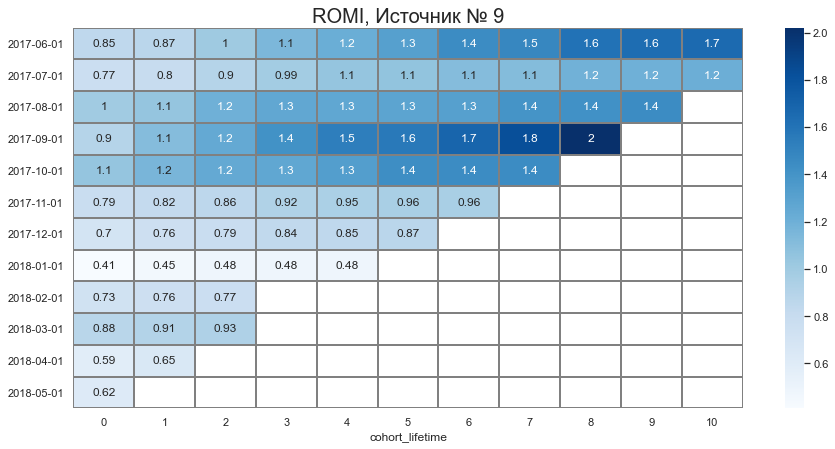

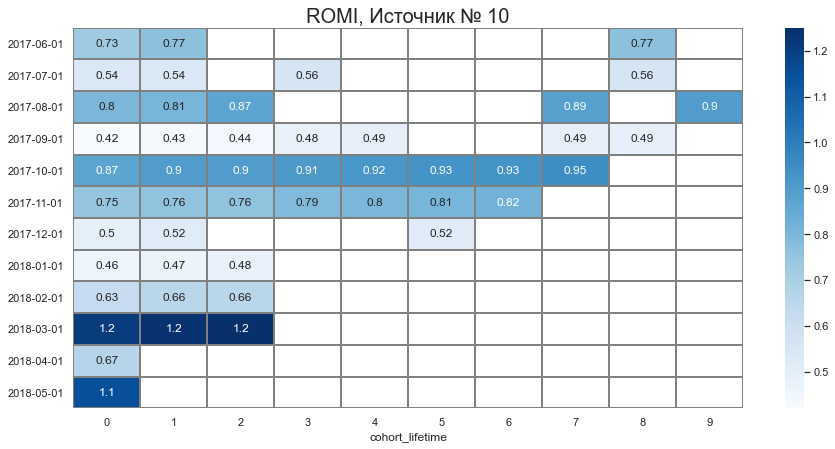

In [89]:
# a list of source numbers is stored in the romi_num variable, with the ROMI value not equal to zero

romi_num = new_total_orders.groupby('source_id')['romi'].mean().index

# the function is called for sources from the above list

for month in romi_num:
    ROMI(month)

**Conclusion:**

The distribution of marketing costs for each advertising source showed that the 4th advertising source turned out to be the most expensive in total: the costs for it are almost twice as high as the second advertising source after it. The peak of costs occurred in the autumn months of 2017. Thus, November became the most expensive month for marketing for the entire analyzed period. This may cause early marked increases in attendance and average receipt. 

However, if the cost of acquiring a client is too high, it will be necessary to change the marketing strategy or even raise prices. It should be noted that the cost of acquiring customers is crucial for all businesses. In the research analysis, this is reflected by the CAC metric, which is calculated as a quotient of the division of advertising costs by the number of new users. In general, only one period has a value exceeding 1.54 USD for attracting one user - this is August 2017. 
The 3rd advertising source has the largest indicator according to the CAC metric for the entire analyzed period. Since it is not the most expensive in terms of total cost allocation, it can be concluded that not enough buyers came from this source. It can be concluded that it is necessary to reconsider the expediency of attracting this advertising source.


Cohort analysis by ROMI showed that all cohorts paid off for all advertising sources.
The 3rd and 10th sources stand out in particular: they have the lowest ROMI of all analyzed sources. The most impressive ROMI is at the 1st source.
It is also necessary to exclude sources 6, 7 and 8, since according to cohort analysis, there is clearly an outflow of users after the first 'month' of the cohorts' life.

## Conclusions and recommendations

In the course of this research, data on site visits, all orders and advertising expenses for the period from June 2017 to the end of May 2018 were analyzed.

A research was carried out on how customers use the service when they make their first purchases on the site, how much money each client brings to the company, when the costs of attracting a client pay off. For these purposes, product metrics, e-commerce metrics, as well as marketing metrics were studied in the research analysis.

As a result, it was revealed that the influx of unique users occurred in the fall of 2017, this is due to large advertising campaigns, the increase in costs for which occurred in the same period.
On average, the average number of user sessions per day is 1.08, which means that a standard user visits the site more than 1 time.

Cohort analysis showed that over time, the retention rate for half a year fell by 2.3%. This suggests that about half of the users do not really want to return to the site. Perhaps you should pay attention to the design of the site or check the technical aspects.
Each cohort of users makes about 1 order per person in the first month, but with an increase in the 'age' of a particular cohort, the number of orders increases dramatically. When analyzing 6 months' life Among the cohorts, it was revealed that there are on average about 10 orders per 1 user. This means that users are satisfied with the first order and return to make subsequent ones.

On the heat map, you can see that the LTV metric increases as the 'life' increases' cohorts. So, users who made a purchase for the first time in June 2017 began to earn twice as much money after six months: the LTV indicator increased from 4.7 to 9.3. It is especially worth noting the cohort of users who made a purchase in September 2017: already for the 3rd month of the 'life' of this cohort, LTV doubled from 5.6 to 11 units., which is a third more than the average value for all cohorts for six months


Cohort analysis by ROMI showed that all cohorts paid off for all advertising sources.
The 3rd and 10th sources stand out in particular: they have the lowest ROMI of all analyzed sources. The most impressive ROMI is at the 1st source.
It is also necessary to exclude sources 6, 7 and 8, since according to cohort analysis, there is clearly an outflow of users after the first 'month' of the cohorts' life.